# 8. ARIMA_GARCH_Strategy

## 模型与参数

ARCH(p)

GARCH(p,q)

GJR-GARCH(p,o,q)

AVARCH(p)

AVGARCH(p,q)

TARCH(p,o,q)

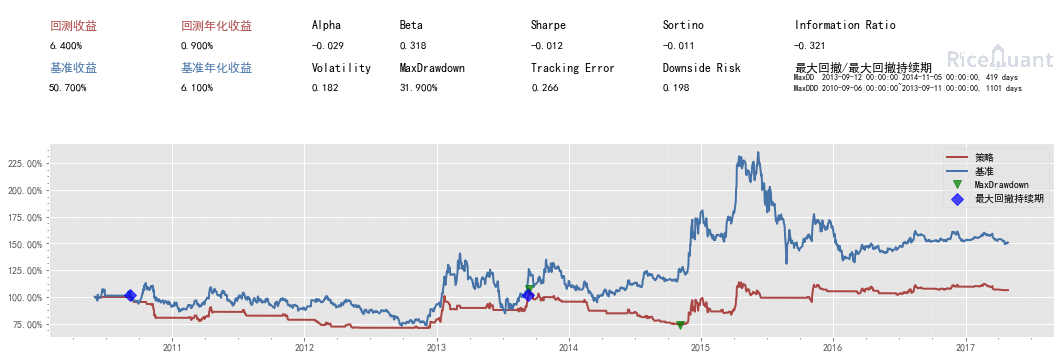

{'sys_analyser': {'benchmark_portfolio':                 cash  market_value  static_unit_net_value  total_value  \
  date                                                                     
  2010-06-01     6.000     99994.000                  1.000   100000.000   
  2010-06-02     6.000     99589.400                  1.000    99595.400   
  2010-06-03     6.000     99531.600                  0.996    99537.600   
  2010-06-04     6.000     99994.000                  0.995   100000.000   
  2010-06-07     6.000     97739.800                  1.000    97745.800   
  2010-06-08     6.000     96526.000                  0.977    96532.000   
  2010-06-09     6.000    102132.600                  0.965   102138.600   
  2010-06-10     6.000     98895.800                  1.021    98901.800   
  2010-06-11     6.000     99127.000                  0.989    99133.000   
  2010-06-17     6.000     99127.000                  0.991    99133.000   
  2010-06-18     6.000    100109.600             

In [20]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import os
import talib as ta
import warnings
import arch
from fxdayu_data import DataAPI



def init(context):
    context.s1 = "000001.XSHE"
    DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/config.py')
    df = DataAPI.candle('000001.XSHG', 'D')
    df['MA_hedge'] = ta.abstract.MA(df, 40)
    context.df = df

def handle_bar(context, bar_dict):
    if can_trade(context):
        time_series(context)

def time_series(context):
    price = history_bars(context.s1, 30, '1d', 'close')
    ret = map(lambda a, b: (b-a)/a, price[:-1], price[1:])
    # print ret
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        #order=sm.tsa.arma_order_select_ic(data.pct_change()[1:],max_ar=5,max_ma=4,ic='bic')['bic_min_order']
        am = arch.arch_model(ret,mean='AR',lags=1, p=1, o=0, q=1, dist='StudentsT',vol='GARCH')
        res = am.fit()
        forecasts = res.forecast()
        cur_position = context.portfolio.positions[context.s1].quantity
        if forecasts.mean[-1:].values[0]>0 and cur_position==0:
            order_target_percent(context.s1, 1)
        if forecasts.mean[-1:].values[0]<0 and cur_position>0:
            order_target_percent(context.s1, 0)

def sell_all(context):
    for stock in context.portfolio.positions:
        order_target_percent(stock, 0)

def can_trade(context):
    if context.df.close.loc[context.now] < context.df.MA_hedge.loc[context.now]:
        sell_all(context)
        return False
    else:
        return True

"""

config = {
  "base": {
    "start_date": "2010-06-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000001.XSHE"
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

run_code(code, config)


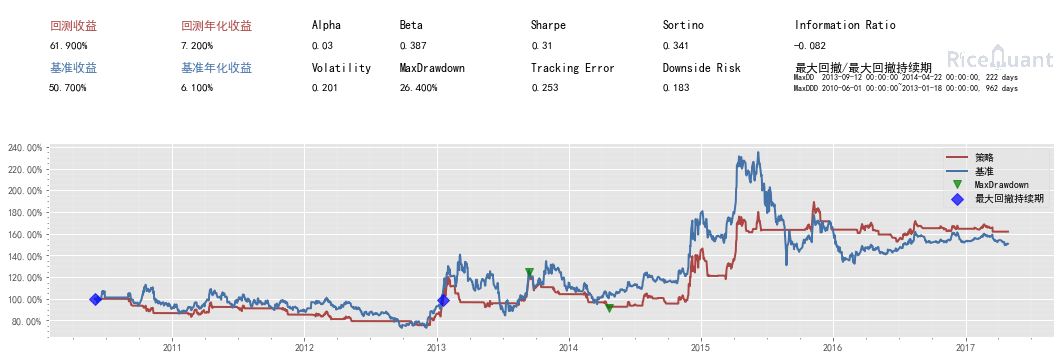

{'sys_analyser': {'benchmark_portfolio':                 cash  market_value  static_unit_net_value  total_value  \
  date                                                                     
  2010-06-01     6.000     99994.000                  1.000   100000.000   
  2010-06-02     6.000     99589.400                  1.000    99595.400   
  2010-06-03     6.000     99531.600                  0.996    99537.600   
  2010-06-04     6.000     99994.000                  0.995   100000.000   
  2010-06-07     6.000     97739.800                  1.000    97745.800   
  2010-06-08     6.000     96526.000                  0.977    96532.000   
  2010-06-09     6.000    102132.600                  0.965   102138.600   
  2010-06-10     6.000     98895.800                  1.021    98901.800   
  2010-06-11     6.000     99127.000                  0.989    99133.000   
  2010-06-17     6.000     99127.000                  0.991    99133.000   
  2010-06-18     6.000    100109.600             

In [11]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import os
import talib as ta
import warnings
import arch
from fxdayu_data import DataAPI



def init(context):
    context.s1 = "000001.XSHE"
    DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Valuation_Selection/config.py')
    df = DataAPI.candle('000001.XSHG', 'D')
    df['MA_hedge'] = ta.abstract.MA(df, 40)
    context.df = df

def handle_bar(context, bar_dict):
    if can_trade(context):
        time_series(context)

def time_series(context):
    price = history_bars(context.s1, 20, '1d', 'close')
    ret = map(lambda a, b: (b-a)/a, price[:-1], price[1:])
    # print ret
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        am = arch.arch_model(ret, vol='GARCH', power=2.0, p=1, o=1, q=2)
        res = am.fit()
        forecasts = res.forecast()
        cur_position = context.portfolio.positions[context.s1].quantity
        if forecasts.mean[-1:].values[0]>0 and cur_position==0:
            order_target_percent(context.s1, 1)
        if forecasts.mean[-1:].values[0]<0 and cur_position>0:
            order_target_percent(context.s1, 0)

def sell_all(context):
    for stock in context.portfolio.positions:
        order_target_percent(stock, 0)

def can_trade(context):
    if context.df.close.loc[context.now] < context.df.MA_hedge.loc[context.now]:
        sell_all(context)
        return False
    else:
        return True
"""
config = {
  "base": {
    "start_date": "2010-06-01",
    "end_date": "2017-05-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000001.XSHE"
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

run_code(code, config)